In [1]:
# !pip3 install pandas
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import numpy as np
import os
import json

plt.style.use('dark_background')

Parse all results and load it to DataFrame.

In [11]:
def parse_results(resultsdir, repr, lr, wd, printing=False):
    outpath = '{}_' + 'lr_{:.3f}_wd_{:.3f}'.format(lr, wd) + '_expid_{:d}_lowshotn_{:d}.json' 
    lowshotns = [1,2,5, 10]
    expids = [1,2,3,4,5]
    all_nums = np.zeros((len(lowshotns), len(expids), 4))
    for i, ei in enumerate(expids):
        for j, ln in enumerate(lowshotns):
            outfile = os.path.join(resultsdir, outpath.format(repr, ei, ln))
            with open(outfile, 'r') as f:
                out = json.load(f)
                all_nums[j,i,:] = np.array(out['accs'])*100

    means = np.mean(all_nums, axis=1)

    if printing:
        print('n \tNovel17 Novel18 All    All with prior')
        print('  \tTop-5   Top-5   Top-5  Top-5')
        
        print('='*80)

        to_print = '\n'.join([str(lowshotns[i])+'\t'+'\t'.join(['{:.2f}'.format(x) for x in y]) for i, y in enumerate(means)])
        print(to_print)
        print('='*80)
        mean_mean = np.mean(means, axis=0)
        print('mean\t'+'\t'.join(['{:.2f}'.format(x) for x in mean_mean]))
    else:
        results = means[:, 1:3].transpose()
        
        novel = {k: v for k, v in zip(lowshotns, results[0].squeeze())}
        novel['type'] = 'novel'
        novel['label'] = resultsdir
        
        all = {k: v for k, v in zip(lowshotns, results[1].squeeze())}
        all['type'] = 'all'
        all['label'] = resultsdir

        return novel, all
        

results = []
for suffix in ['hierarchy,glove-mean-InnerProduct', 'wiki,glove-mean-InnerProduct', 'wiki,hierarchy-mean-InnerProduct', 'wiki,hierarchy,glove-mean-InnerProduct']:
    r1, r2 = parse_results(f'/tf/KGTN2/results/KGTNens-181121/{suffix}', 'ResNet50_sgm', 0.01, 0.0001)
    results.append(r1)
    results.append(r2)


for suffix in [
    # 'KGTN/CosSim', 
    'KGTN_InnerProduct', 
    # 'KGTN_PearCorr', 
    # 'KGTN_hierarchy'
    ]:
    r1, r2 = parse_results(f'/tf/KGTN2/results/{suffix}', 'ResNet50_sgm', 0.01, 0.0001)
    results.append(r1)
    results.append(r2)

# r1, r2 = parse_results(f'/tf/KGTN2/results/baseline', 'ResNet50_sgm', 0.1, 0.0001)
# results.append(r1), results.append(r2)

df = pd.DataFrame(results)
df

,1,2,5,10,type,label
0,62.300965,70.451447,78.897749,82.210932,novel,"/tf/KGTN2/results/KGTNens-181121/hierarchy,glo..."
1,66.886785,73.864300,81.064300,83.222091,all,"/tf/KGTN2/results/KGTNens-181121/hierarchy,glo..."
2,60.410289,69.408360,78.805145,82.096463,novel,"/tf/KGTN2/results/KGTNens-181121/wiki,glove-me..."
3,66.067061,73.301775,81.011440,83.150296,all,"/tf/KGTN2/results/KGTNens-181121/wiki,glove-me..."
4,57.886817,67.485531,78.492605,81.912540,novel,"/tf/KGTN2/results/KGTNens-181121/wiki,hierarch..."
5,64.095464,71.830375,80.795266,83.042998,all,"/tf/KGTN2/results/KGTNens-181121/wiki,hierarch..."
6,58.738264,67.954984,78.742122,81.702894,novel,"/tf/KGTN2/results/KGTNens-181121/wiki,hierarch..."
7,63.901381,71.431953,80.908876,82.875740,all,"/tf/KGTN2/results/KGTNens-181121/wiki,hierarch..."
8,61.961415,71.082958,78.533762,82.482315,novel,/tf/KGTN2/results/KGTN_InnerProduct
9,68.336095,75.273373,80.923866,83.396450,all,/tf/KGTN2/results/KGTN_InnerProduct


In [17]:
# df['label'] = df['label'].apply(lambda x: x.split('/')[-1])
df[df['type']=='novel']

,1,2,5,10,type,label
0,62.300965,70.451447,78.897749,82.210932,novel,"hierarchy,glove-mean-InnerProduct"
2,60.410289,69.408360,78.805145,82.096463,novel,"wiki,glove-mean-InnerProduct"
4,57.886817,67.485531,78.492605,81.912540,novel,"wiki,hierarchy-mean-InnerProduct"
6,58.738264,67.954984,78.742122,81.702894,novel,"wiki,hierarchy,glove-mean-InnerProduct"
8,61.961415,71.082958,78.533762,82.482315,novel,KGTN_InnerProduct


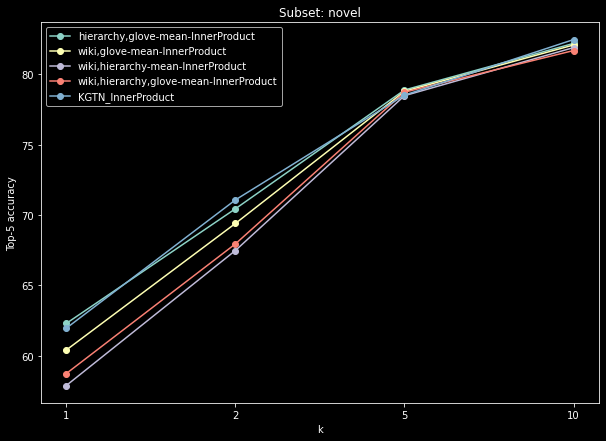

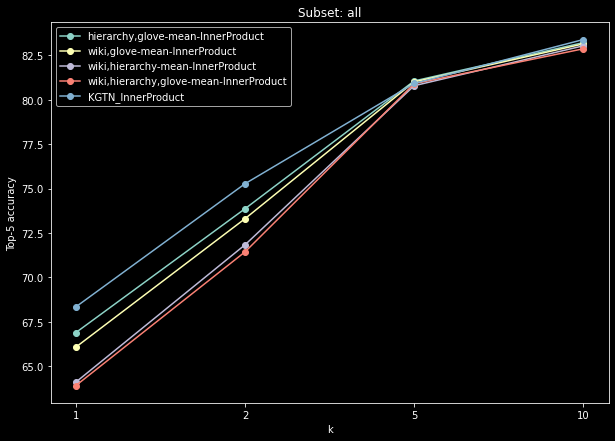

In [13]:

labels = ["1", "2", "5", "10"]

for current_type in ['novel', 'all']:
    plt.figure(figsize=(10,7))
    for x in df[df.type == current_type].iterrows():
        # print(x[1][:4].tolist())
        plt.plot(labels, x[1][:4].tolist(), marker='o', label=x[1]['label'])
        plt.legend()
        plt.title(f'Subset: {current_type}')
        plt.ylabel('Top-5 accuracy')
        plt.xlabel('k')

    plt.show()
